<a href="https://colab.research.google.com/github/Tales-Augusto/BTC-E-ADA/blob/main/Compara%C3%A7%C3%A3o_De_Multiplica%C3%A7%C3%A3o_Entre_ADA_e_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
!pip install -U pandas_datareader
!pip install yfinance
!pip install mplfinance 
!pip install matplotlib-venn
import yfinance as yf
import mplfinance as mpf
import plotly
import plotly.offline as py
from plotly.offline import plot,iplot
plotly.offline.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"
import plotly.graph_objs as go 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
!pip install investpy
import investpy
from functools import reduce
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
## COLETANDO OS DADOS PELO PANDAS DATAREADER
dados = pdr.data.get_data_yahoo('ADA-USD',start='2021-08-14')
dados1 = pdr.data.get_data_yahoo('BTC-USD',start='2021-08-14')

In [115]:
## Mundando os nomes da coluna que iremos usar
dados.rename(columns={'Adj Close':'Cardano'},inplace=True)

In [116]:
## Mundando os nomes da coluna que iremos usar, vamos usar a coluna adj close e estamos mundando o nome dela para o nome do respectivo ativo
dados1.rename(columns={'Adj Close':'Bitcoin'},inplace=True)

In [117]:
#visulizando base de dados1 BTC
dados1.head()

,High,Low,Open,Close,Volume,Bitcoin
Date,,,,,,
2021-08-14,48098.683594,46177.632812,47810.687500,47096.945312,31211354442,47096.945312
2021-08-15,47357.105469,45579.589844,47096.667969,47047.003906,30988958446,47047.003906
2021-08-16,47998.097656,45700.320312,47019.960938,46004.484375,32776876610,46004.484375
2021-08-17,47139.570312,44512.417969,45936.457031,44695.359375,33451362600,44695.359375
2021-08-18,45952.062500,44364.027344,44686.750000,44801.187500,32194123075,44801.187500


In [118]:
#visualizando a base de dados ADA
dados.head()

,High,Low,Open,Close,Volume,Cardano
Date,,,,,,
2021-08-14,2.250360,2.093593,2.138287,2.191687,7965959274,2.191687
2021-08-15,2.248431,2.039562,2.189896,2.169153,5964077684,2.169153
2021-08-16,2.195450,2.051724,2.167868,2.079417,4479074279,2.079417
2021-08-17,2.141046,1.912754,2.072315,1.926601,3862425430,1.926601
2021-08-18,2.161289,1.887675,1.924480,2.108560,4919304569,2.108560


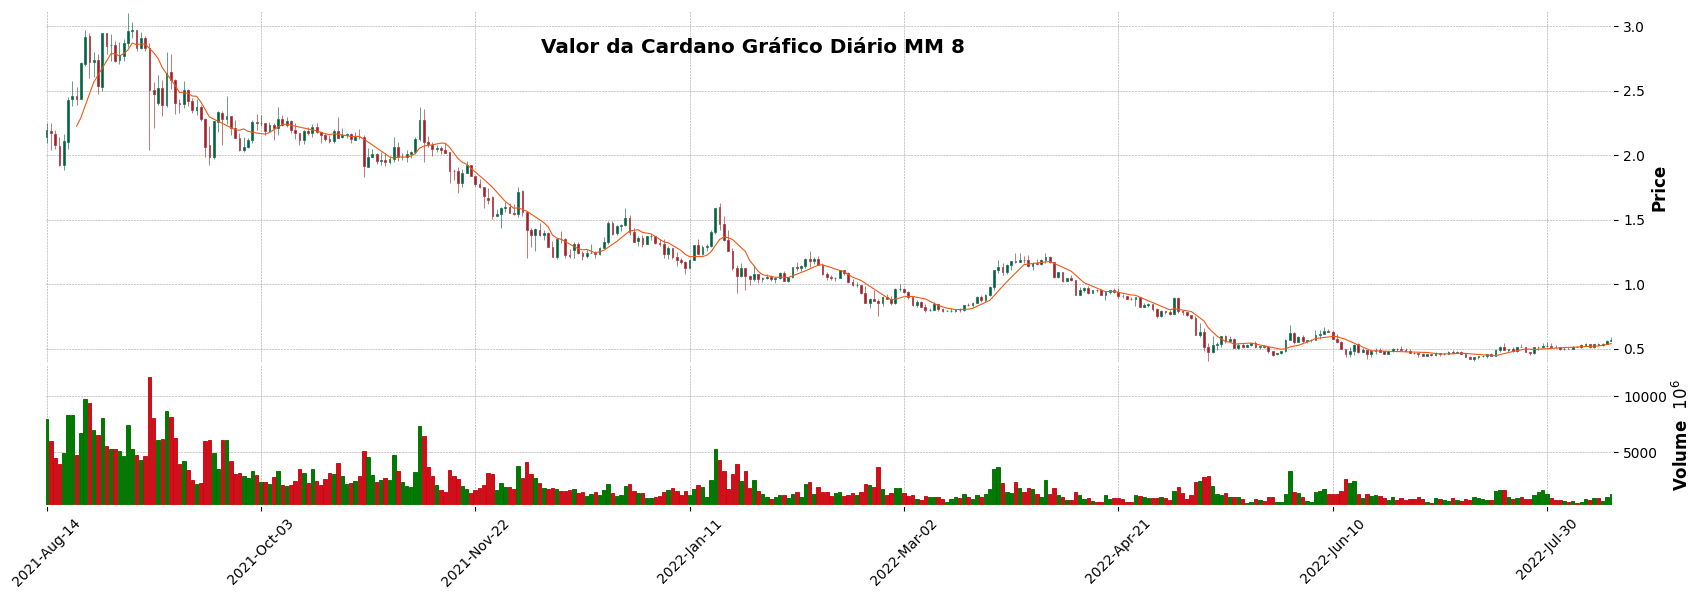

In [119]:
# Plotando os graficos usando MPLFINANCE com média movel de 8 Cardano
mpf.plot(dados['2021-08-14':'2022-08-14'],figratio=(22,7),type='candle',volume=True,mav=(8),title=f"Valor da Cardano Gráfico Diário MM 8",tight_layout=True,style="charles")

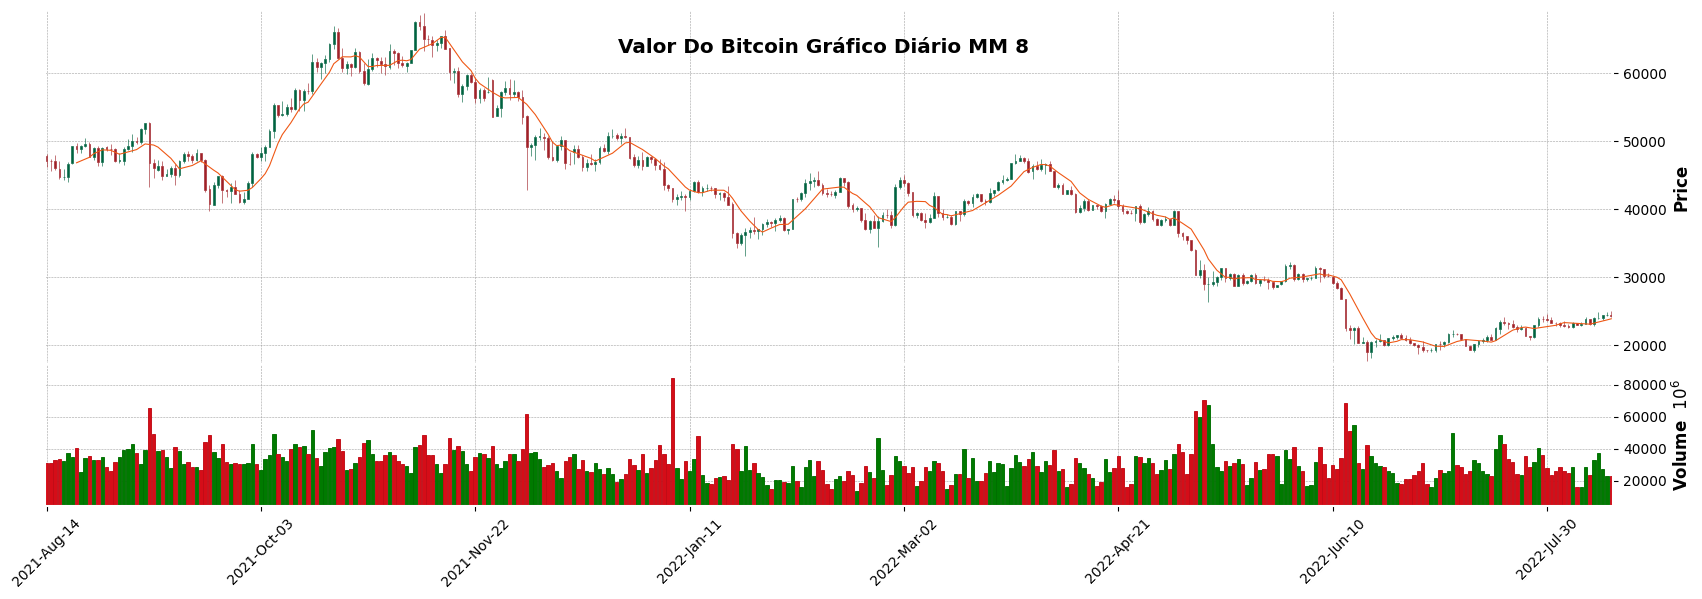

In [120]:
# Plotando os graficos usando MPLFINANCE com média movel de 8 Bitcoin
mpf.plot(dados1['2021-08-14':'2022-08-14'],figratio=(22,7),type='candle',volume=True,mav=(8),title=f"                    Valor Do Bitcoin Gráfico Diário MM 8",tight_layout=True,style="charles")

In [121]:
dados_ret10 = pd.DataFrame()

In [122]:
dados_ret11 = pd.DataFrame()

In [123]:
dados_ret10['log_retorno'] = np.log(dados1['Bitcoin'] / dados1['Bitcoin'].shift(1))
print (dados_ret10['log_retorno'])


Date
2021-08-14         NaN
2021-08-15   -0.001061
2021-08-16   -0.022408
2021-08-17   -0.028869
2021-08-18    0.002365
                ...   
2022-08-27   -0.010832
2022-08-28   -0.021430
2022-08-29    0.034135
2022-08-30   -0.025001
2022-08-31    0.013854
Name: log_retorno, Length: 383, dtype: float64


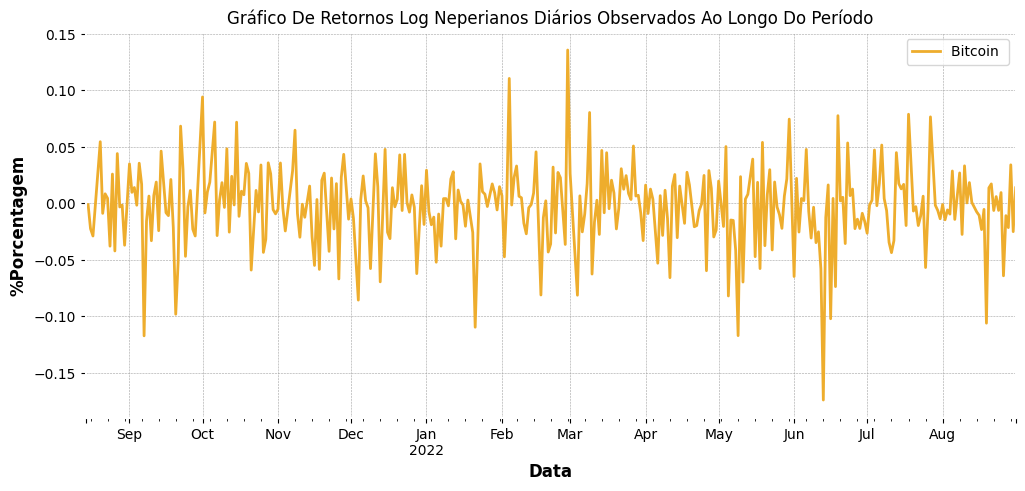

In [124]:
dados_ret10['log_retorno'].plot(figsize=(12, 5),color = "#EEAD2D",label = "Bitcoin ")
plt.title("Gráfico De Retornos Log Neperianos Diários Observados Ao Longo Do Período")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

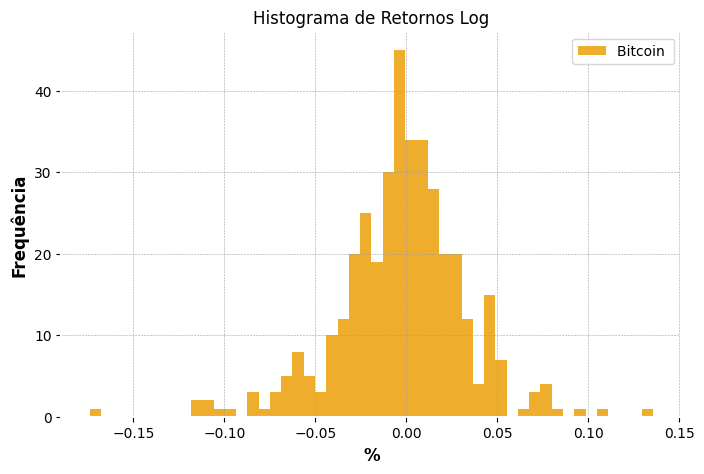

In [125]:
dados_ret10['log_retorno'].plot.hist(figsize=(8, 5),bins=50,color = "#EEAD2D",label = "Bitcoin ")
plt.title("Histograma de Retornos Log")
plt.xlabel("%")
plt.ylabel ("Frequência")
plt.legend()

In [126]:
dados_ret10['log_retorno'].describe()

count    382.000000
mean      -0.002233
std        0.035198
min       -0.174053
25%       -0.021157
50%       -0.001398
75%        0.017146
max        0.135764
Name: log_retorno, dtype: float64

In [127]:
dados_ret_anual10 = dados_ret10['log_retorno'].mean()*365
dados_ret_anual10

-0.8148797934479625

In [128]:
print (str( round( dados_ret_anual10, 4) * 100) + ' %'+' Retorno Médio Anual Log')

-81.49 % Retorno Médio Anual Log


In [129]:
ret_semanal10 = dados_ret10['log_retorno'].resample('w').mean()

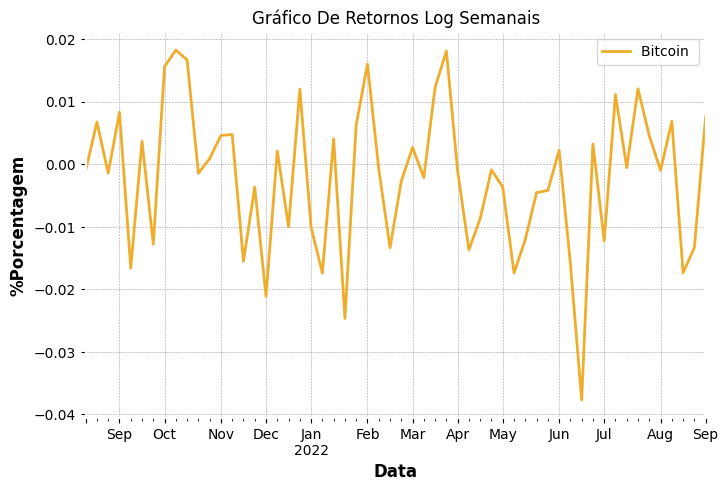

In [130]:
ret_semanal10.plot(figsize=(8, 5),color = "#EEAD2D",label = "Bitcoin ")
plt.title("Gráfico De Retornos Log Semanais")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

In [131]:
ret_mensal10 = dados_ret10['log_retorno'].resample('M').mean()

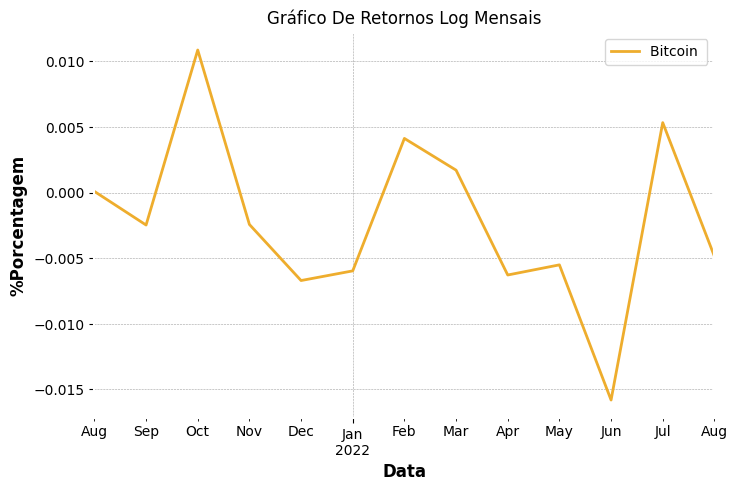

In [132]:
ret_mensal10.plot(figsize=(8, 5),color = "#EEAD2D",label = "Bitcoin ")
plt.title("Gráfico De Retornos Log Mensais")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

In [133]:
dados_ret_acm10 = (1+dados_ret10['log_retorno']).cumprod()

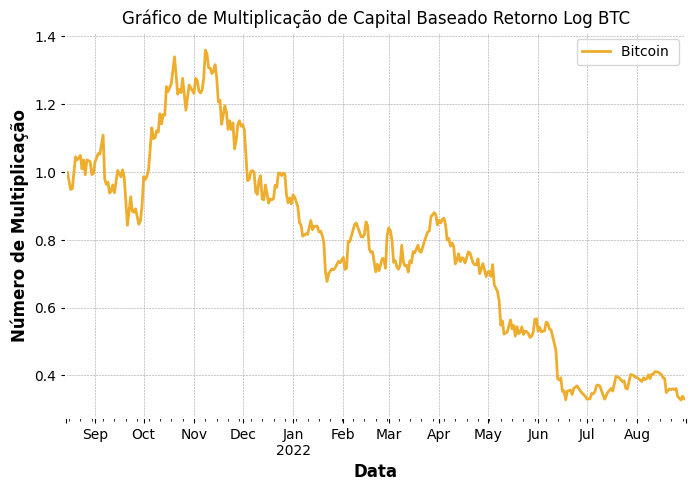

In [134]:
dados_ret_acm10.plot(figsize=(8, 5),color = "#EEAD2D",label = "Bitcoin ")
plt.title("Gráfico de Multiplicação de Capital Baseado Retorno Log BTC")
plt.xlabel("Data")
plt.ylabel ("Número de Multiplicação")
plt.legend()
plt.show()

In [135]:
dados_ret10['log_retorno'].std()

0.03519807681467912

In [136]:
med_mov_vol10 = dados_ret10['log_retorno'].rolling(window=30).std()

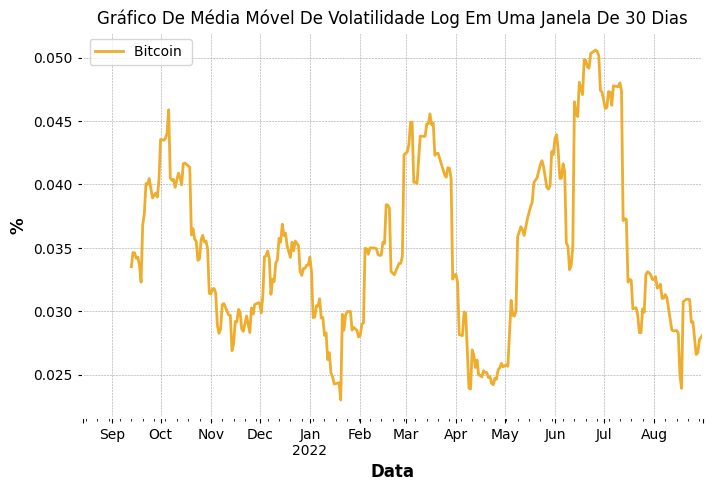

In [137]:
med_mov_vol10.plot(figsize=(8, 5),color = "#EEAD2D",label = "Bitcoin ")
plt.title("Gráfico De Média Móvel De Volatilidade Log Em Uma Janela De 30 Dias")
plt.xlabel("Data")
plt.ylabel ("%")
plt.legend()
plt.show()

In [138]:
# Calculo de retornos Simples
dados_ret1 = dados1['Bitcoin'].pct_change()
dados_ret1

Date
2021-08-14         NaN
2021-08-15   -0.001060
2021-08-16   -0.022159
2021-08-17   -0.028456
2021-08-18    0.002368
                ...   
2022-08-27   -0.010774
2022-08-28   -0.021202
2022-08-29    0.034724
2022-08-30   -0.024691
2022-08-31    0.013951
Name: Bitcoin, Length: 383, dtype: float64

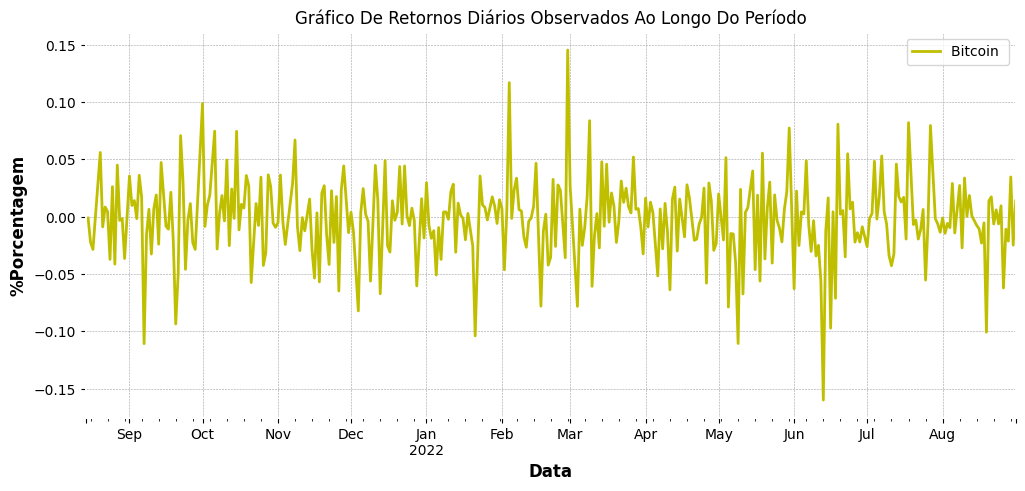

In [139]:
# Plotagem do gráfico de retornos 
from matplotlib.dates import YearLocator
dados_ret1.plot(figsize=(12, 5),color = "y",label = "Bitcoin ")
plt.title("Gráfico De Retornos Diários Observados Ao Longo Do Período")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

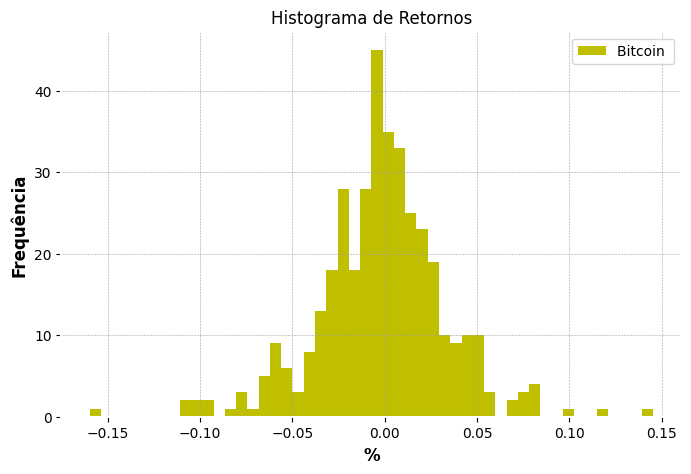

In [140]:
#Plotagem do gráfico de retorno no modelo de histograma 
# onde os retornos ocorre com mais frequência ? até onde pode chegar as variaçãoes de retorno dentro do preço do ativo ? o histograma responde bem essas perguntas 
dados_ret1.plot.hist(figsize=(8, 5),bins=50,color = "y",label = "Bitcoin ")
plt.title("Histograma de Retornos")
plt.xlabel("%")
plt.ylabel ("Frequência")
plt.legend()

In [141]:
# estatística descritiva dos retornos 
dados_ret1.describe()

count    382.000000
mean      -0.001616
std        0.034924
min       -0.159747
25%       -0.020935
50%       -0.001397
75%        0.017293
max        0.145412
Name: Bitcoin, dtype: float64

In [142]:
# retorno médio anual 
dados_ret_anual1 = dados_ret1.mean()*365
dados_ret_anual1

-0.5899442605006588

In [143]:
# porcentagem anual do retorno médio
print (str( round( dados_ret_anual1, 5) * 100) + ' %'+' Retorno Médio Anual')

-58.994 % Retorno Médio Anual


In [144]:
# ajuste de retornos em semanas
ret_semanal = dados_ret1.resample('w').mean()

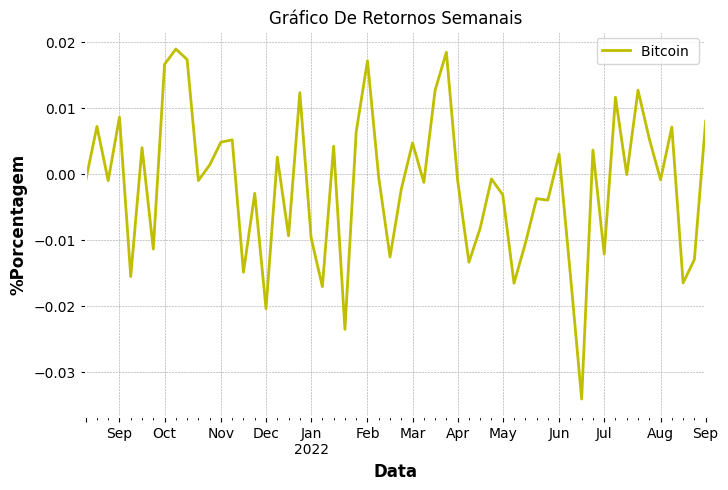

In [145]:
ret_semanal.plot(figsize=(8, 5),color = "y",label = "Bitcoin ")
plt.title("Gráfico De Retornos Semanais")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

In [146]:
ret_mensal = dados_ret1.resample('M').mean()

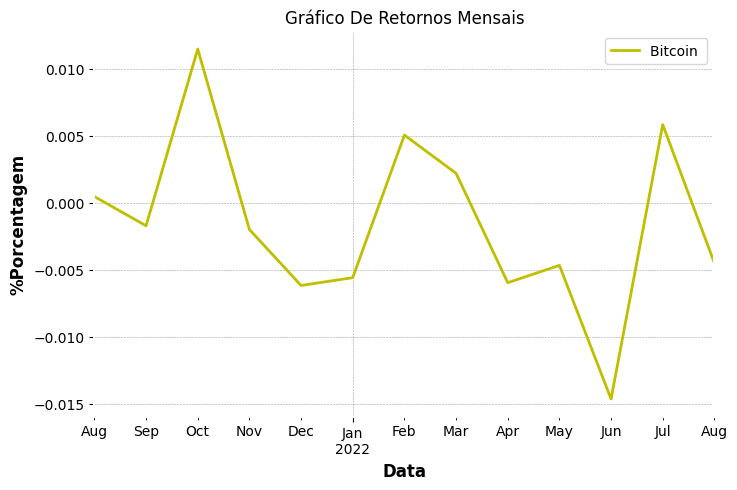

In [147]:
ret_mensal.plot(figsize=(8, 5),color = "y",label = "Bitcoin ")
plt.title("Gráfico De Retornos Mensais")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

In [148]:
#retornos normalizados a base 100
dados_ret_acm1 = (1+dados_ret1).cumprod()

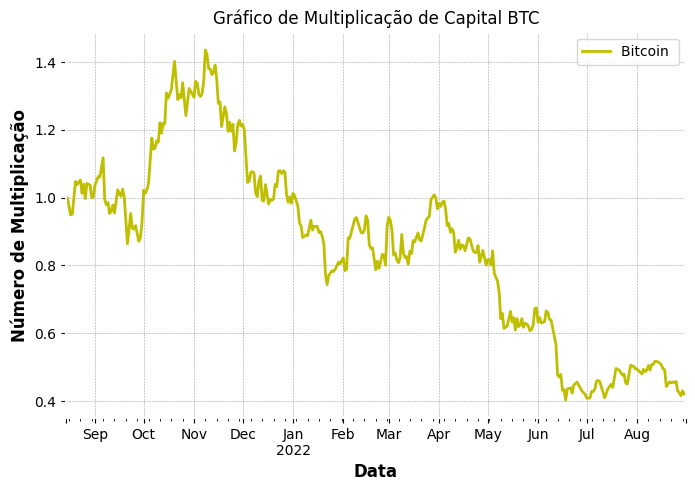

In [149]:
# Plotagem do gráfico de força de multiplicação de capital 
dados_ret_acm1.plot(figsize=(8, 5),color = "y",label = "Bitcoin ")
plt.title("Gráfico de Multiplicação de Capital BTC")
plt.xlabel("Data")
plt.ylabel ("Número de Multiplicação")
plt.legend()
plt.show()

In [150]:
dados_ret1.std()

0.03492397549230709

In [151]:
med_mov_vol = dados_ret1.rolling(window=30).std()


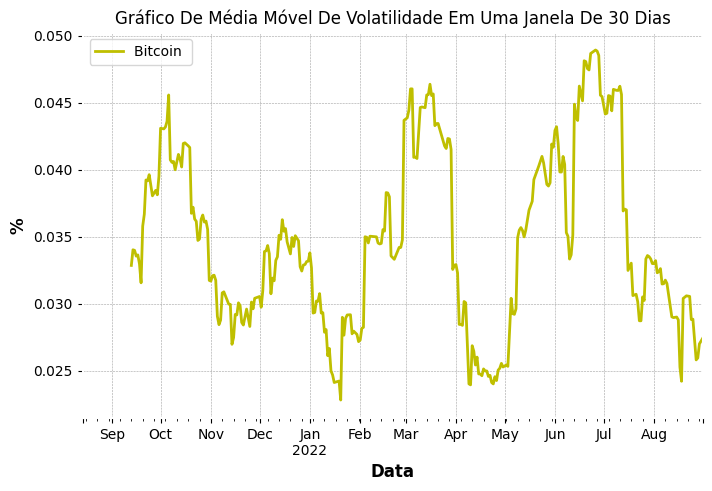

In [152]:
med_mov_vol.plot(figsize=(8, 5),color = "y",label = "Bitcoin ")
plt.title("Gráfico De Média Móvel De Volatilidade Em Uma Janela De 30 Dias")
plt.xlabel("Data")
plt.ylabel ("%")
plt.legend()
plt.show()

In [153]:
dados_ret11['log_retorno1'] = np.log(dados['Cardano'] / dados['Cardano'].shift(1))
print (dados_ret11['log_retorno1'])

Date
2021-08-14         NaN
2021-08-15   -0.010335
2021-08-16   -0.042249
2021-08-17   -0.076330
2021-08-18    0.090248
                ...   
2022-08-27    0.042797
2022-08-28   -0.044688
2022-08-29    0.046909
2022-08-30    0.003247
2022-08-31    0.001348
Name: log_retorno1, Length: 383, dtype: float64


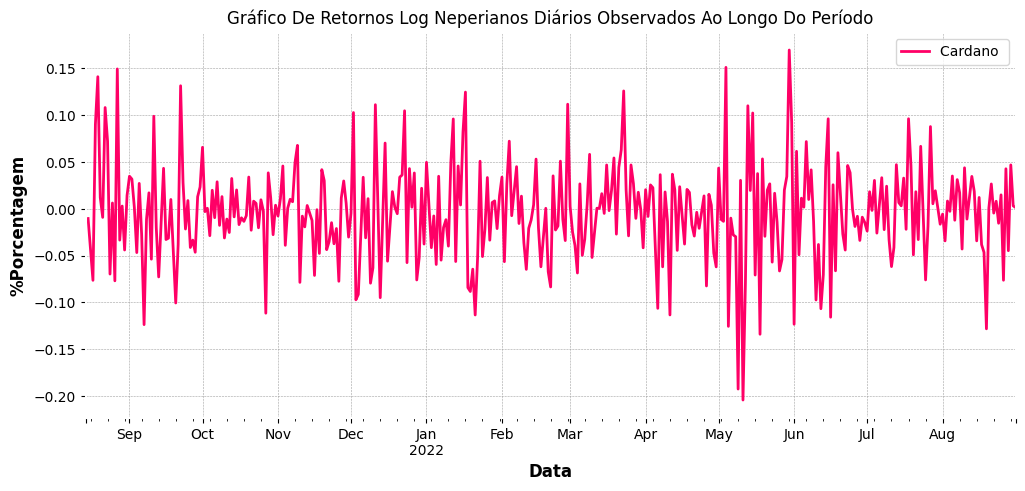

In [154]:
dados_ret11['log_retorno1'].plot(figsize=(12, 5),color = "#FF0066",label = "Cardano ")
plt.title("Gráfico De Retornos Log Neperianos Diários Observados Ao Longo Do Período")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

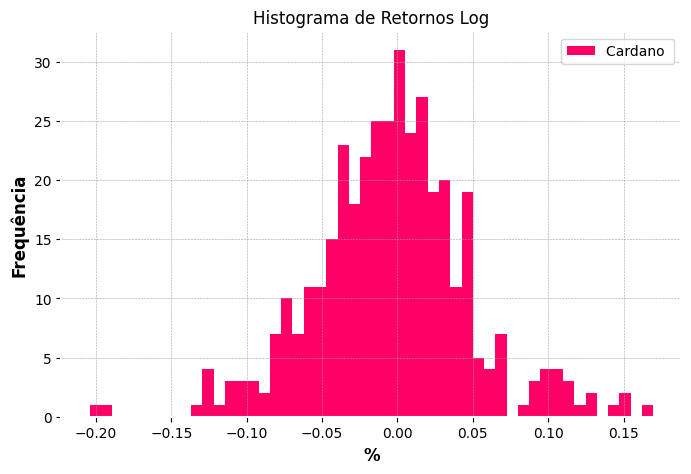

In [155]:
dados_ret11['log_retorno1'].plot.hist(figsize=(8, 5),bins=50,color = "#FF0066",label = "Cardano ")
plt.title("Histograma de Retornos Log")
plt.xlabel("%")
plt.ylabel ("Frequência")
plt.legend()

In [156]:
dados_ret11['log_retorno1'].describe()

count    382.000000
mean      -0.004128
std        0.051652
min       -0.204187
25%       -0.033675
50%       -0.002554
75%        0.025225
max        0.169635
Name: log_retorno1, dtype: float64

In [157]:
dados_ret_anual11 = dados_ret11['log_retorno1'].mean()*365
dados_ret_anual11

-1.5068414942883477

In [158]:
print (str( round( dados_ret_anual11, 4) * 100) + ' %'+' Retorno Médio Anual Log')

-150.67999999999998 % Retorno Médio Anual Log


In [159]:
ret_semanal11 = dados_ret11['log_retorno1'].resample('w').mean()

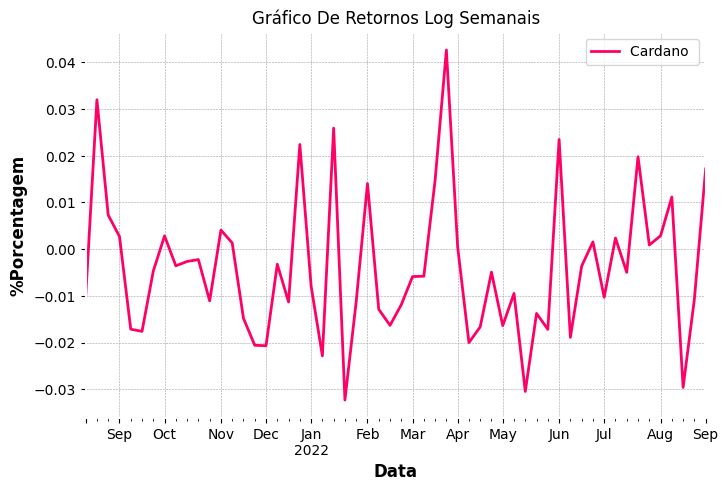

In [160]:
ret_semanal11.plot(figsize=(8, 5),color = "#FF0066",label = "Cardano ")
plt.title("Gráfico De Retornos Log Semanais")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

In [161]:
ret_mensal11 = dados_ret11['log_retorno1'].resample('M').mean()

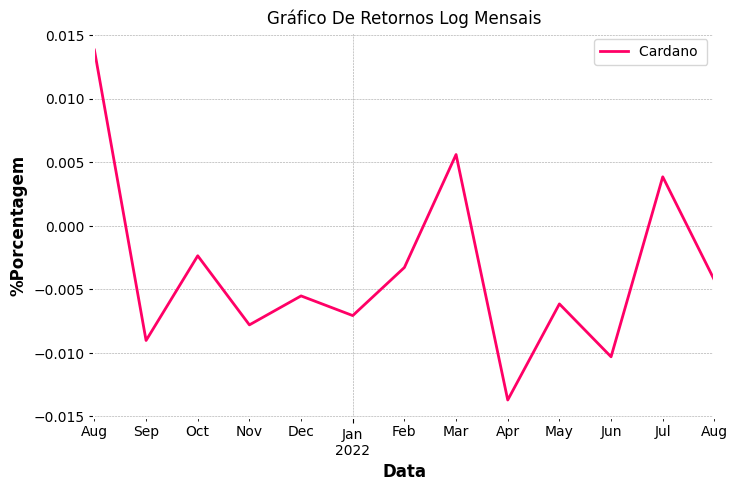

In [162]:
ret_mensal11.plot(figsize=(8, 5),color = "#FF0066",label = "Cardano ")
plt.title("Gráfico De Retornos Log Mensais")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

In [163]:
dados_ret_acm11 = (1+dados_ret11['log_retorno1']).cumprod()

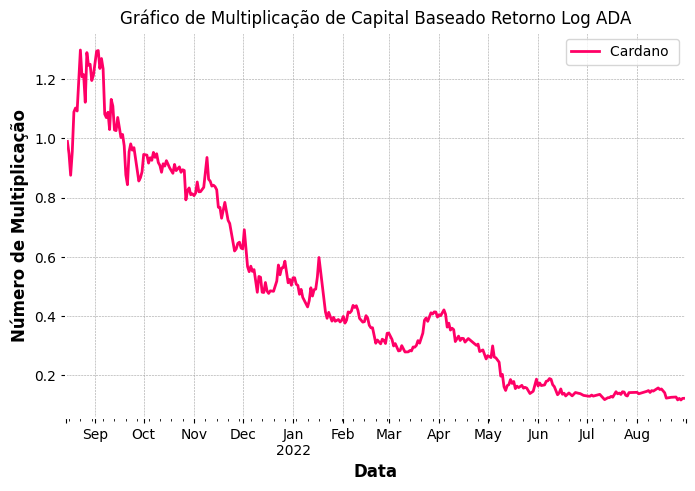

In [164]:
dados_ret_acm11.plot(figsize=(8, 5),color = "#FF0066",label = "Cardano ")
plt.title("Gráfico de Multiplicação de Capital Baseado Retorno Log ADA")
plt.xlabel("Data")
plt.ylabel ("Número de Multiplicação")
plt.legend()
plt.show()

In [165]:
dados_ret11['log_retorno1'].std()

0.051651542061663294

In [166]:
med_mov_vol11 = dados_ret11['log_retorno1'].rolling(window=30).std()

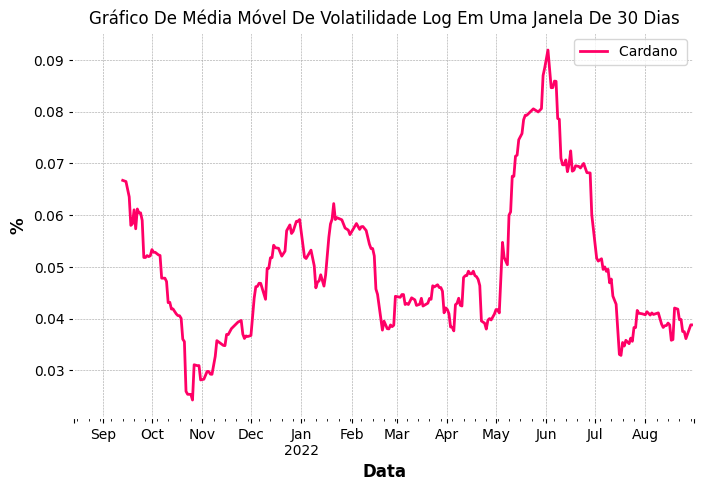

In [167]:
med_mov_vol11.plot(figsize=(8, 5),color = "#FF0066",label = "Cardano ")
plt.title("Gráfico De Média Móvel De Volatilidade Log Em Uma Janela De 30 Dias")
plt.xlabel("Data")
plt.ylabel ("%")
plt.legend()
plt.show()

In [168]:
dados_ret = dados['Cardano'].pct_change()
dados_ret

Date
2021-08-14         NaN
2021-08-15   -0.010282
2021-08-16   -0.041369
2021-08-17   -0.073490
2021-08-18    0.094446
                ...   
2022-08-27    0.043726
2022-08-28   -0.043704
2022-08-29    0.048027
2022-08-30    0.003253
2022-08-31    0.001349
Name: Cardano, Length: 383, dtype: float64

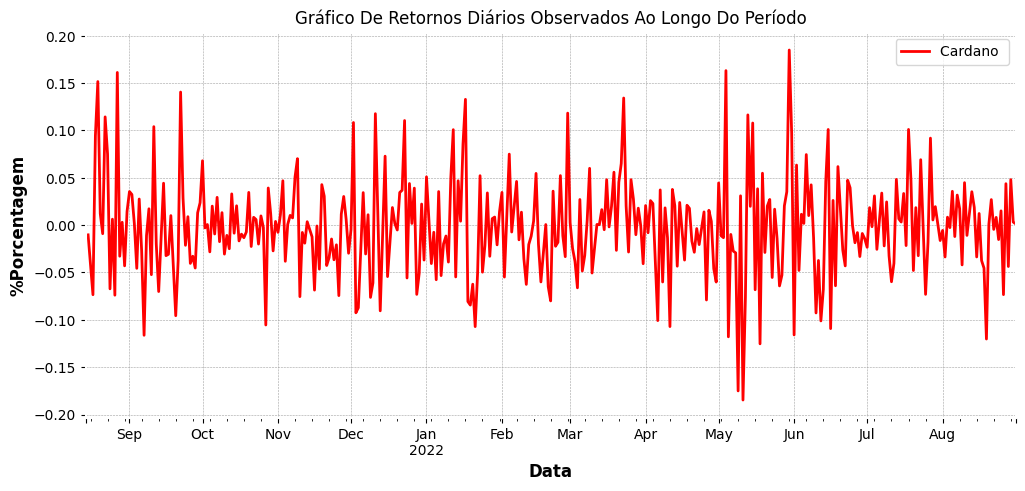

In [169]:
dados_ret.plot(figsize=(12, 5),color = "r",label = "Cardano ")
plt.title("Gráfico De Retornos Diários Observados Ao Longo Do Período")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

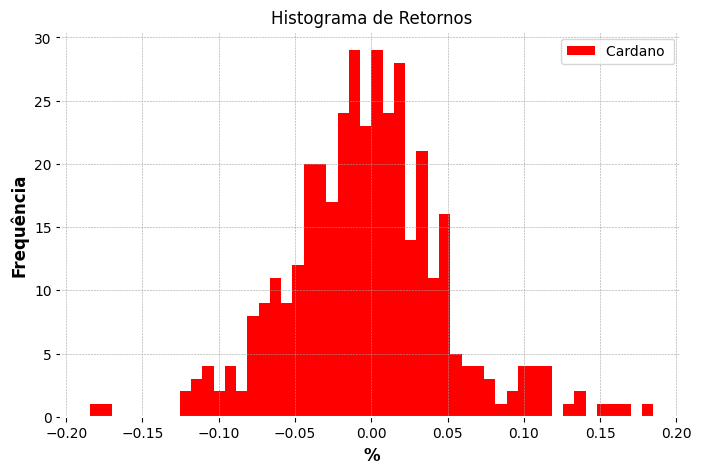

In [170]:
# onde os retornos ocorre com mais frequência ? até onde pode chegar as variaçãoes de retorno dentro do preço do ativo ? o histograma responde bem essas perguntas 
# quanto maior sua amplitude maior sua volatilidade e maior risco
dados_ret.plot.hist(figsize=(8, 5),bins=50,color = "r",label = "Cardano ")
plt.title("Histograma de Retornos")
plt.xlabel("%")
plt.ylabel ("Frequência")
plt.legend()

In [171]:
dados_ret.describe()

count    382.000000
mean      -0.002793
std        0.051602
min       -0.184690
25%       -0.033114
50%       -0.002551
75%        0.025546
max        0.184873
Name: Cardano, dtype: float64

In [172]:
dados_ret_anual = dados_ret.mean()*365
dados_ret_anual

-1.0196093211324195

In [173]:
print (str( round( dados_ret_anual, 5) * 100) + ' %'' Retorno Médio Anual')

-101.96099999999998 % Retorno Médio Anual


In [174]:
dados_ret_acm = (1+dados_ret).cumprod()


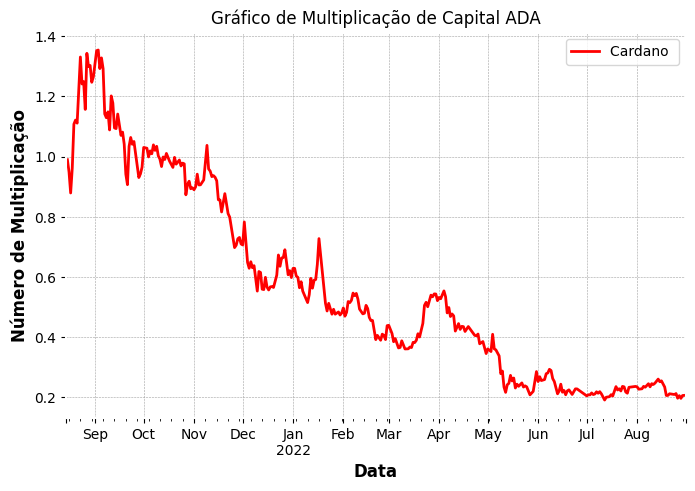

In [175]:
dados_ret_acm.plot(figsize=(8, 5),color = "r",label = "Cardano ")
plt.title("Gráfico de Multiplicação de Capital ADA")
plt.xlabel("Data")
plt.ylabel ("Número de Multiplicação")
plt.legend()
plt.show()

In [176]:
ret_semanal1 = dados_ret.resample('w').mean()


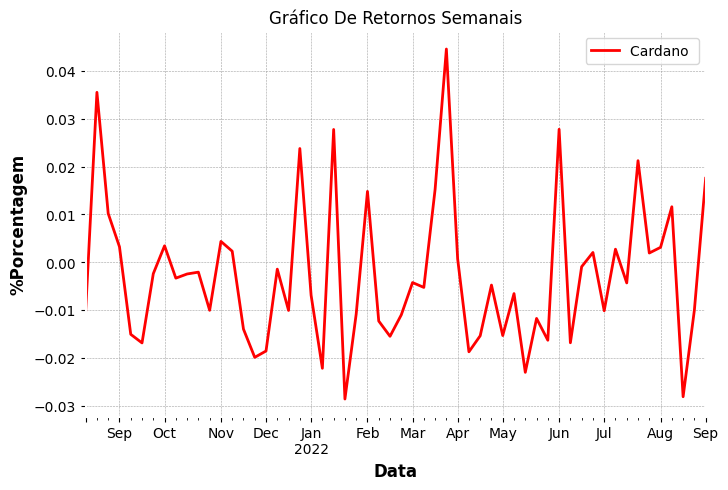

In [177]:
ret_semanal1.plot(figsize=(8, 5),color = "r",label = "Cardano ")
plt.title("Gráfico De Retornos Semanais")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

In [178]:
ret_mensal1 = dados_ret.resample('M').mean()

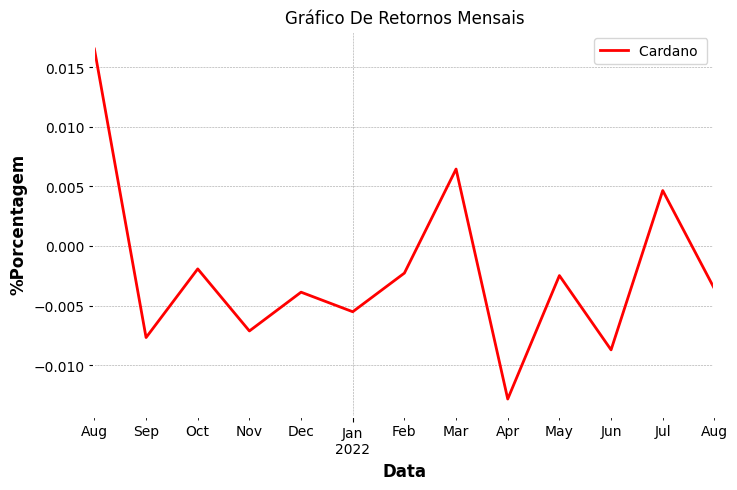

In [179]:
ret_mensal1.plot(figsize=(8, 5),color = "r",label = "Cardano ")
plt.title("Gráfico De Retornos Mensais")
plt.xlabel("Data")
plt.ylabel ("%Porcentagem")
plt.legend()
plt.show()

In [180]:
dados_ret.std()

0.05160191763368463

In [181]:
med_mov_vol1 = dados_ret.rolling(window=30).std()

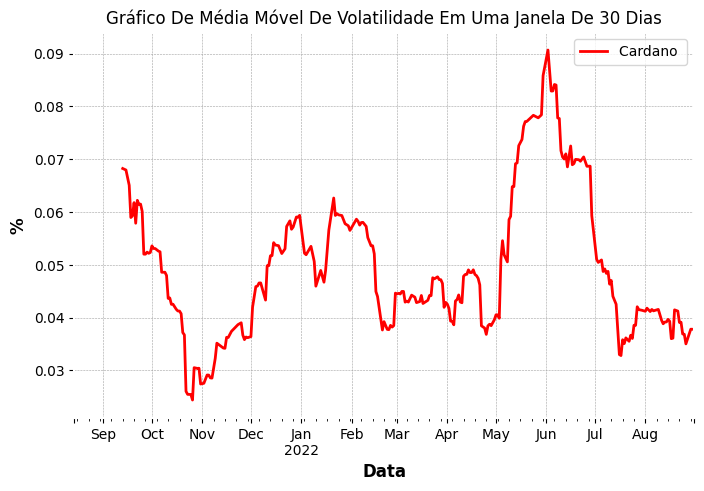

In [182]:
med_mov_vol1.plot(figsize=(8, 5),color = "r",label = "Cardano ")
plt.title("Gráfico De Média Móvel De Volatilidade Em Uma Janela De 30 Dias")
plt.xlabel("Data")
plt.ylabel ("%")
plt.legend()
plt.show()

Text(0, 0.5, 'Número de Multiplicação')

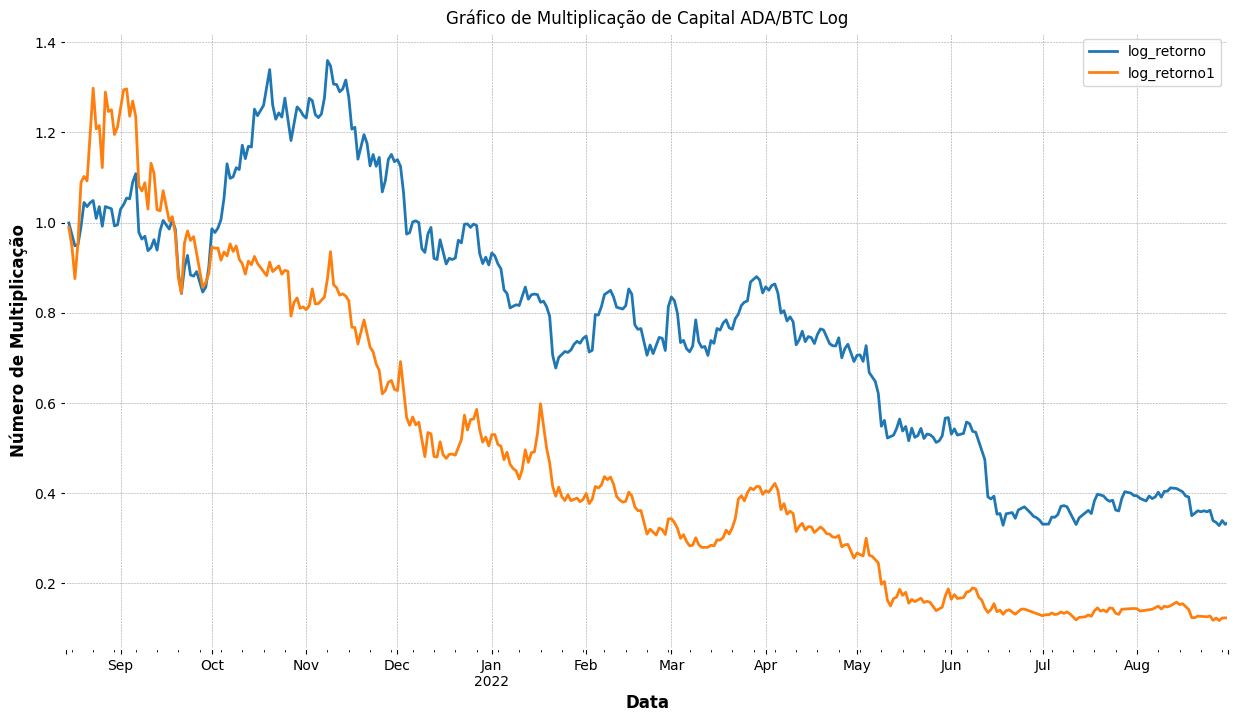

In [183]:
# GRÁFICO DE COMPARAÇAÕ DE MULTIPLICAÇÃO DE CAPITAL 
from IPython.core.pylabtools import figsize
Bit_Car_LOG = pd.merge(dados_ret_acm10,dados_ret_acm11,how='inner',on='Date').plot(figsize(15,8))
plt.title("Gráfico de Multiplicação de Capital ADA/BTC Log")
plt.xlabel("Data")
plt.ylabel ("Número de Multiplicação")


Text(0, 0.5, 'Número de Multiplicação')

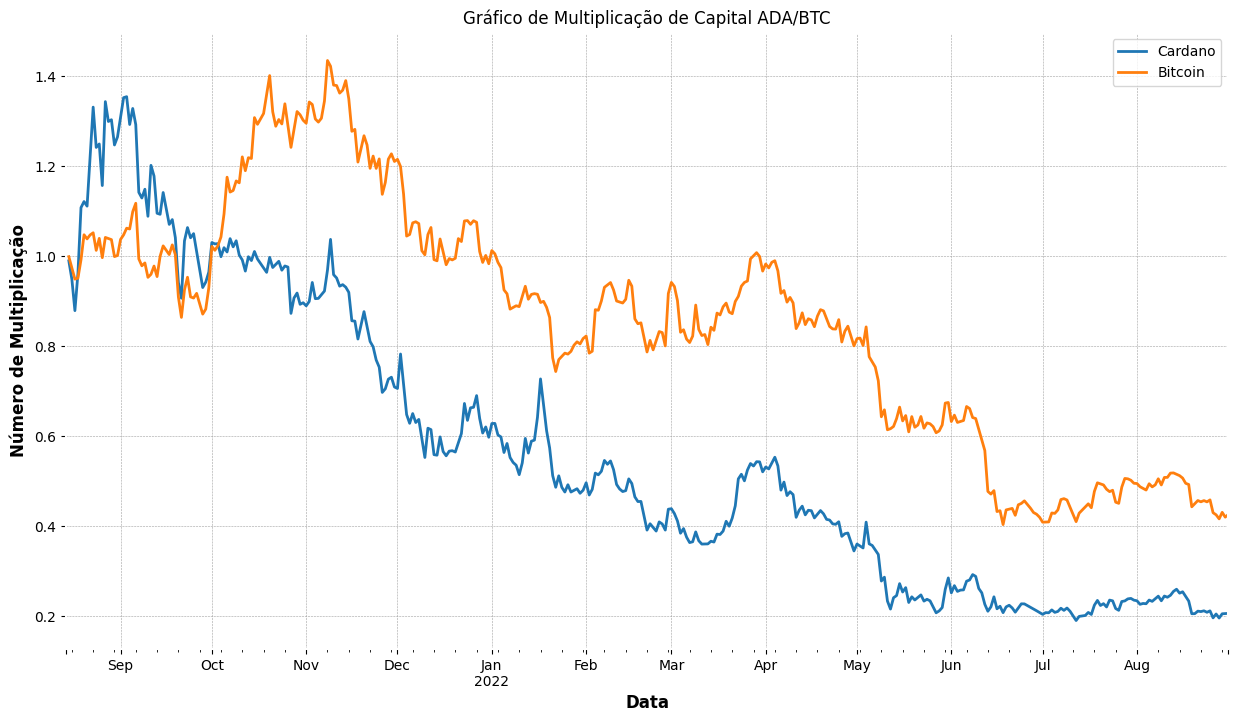

In [184]:
# GRÁFICO DE COMPARAÇAÕ DE MULTIPLICAÇÃO DE CAPITAL 
from IPython.core.pylabtools import figsize
Bit_Car = pd.merge(dados_ret_acm,dados_ret_acm1,how='inner',on='Date').plot(figsize(15,8))
plt.title("Gráfico de Multiplicação de Capital ADA/BTC")
plt.xlabel("Data")
plt.ylabel ("Número de Multiplicação")


In [185]:
######################Informações adicionais para analise de gráfico mais profunda do preço no intraday##########################

In [186]:
D1 =  pd.read_csv('/content/drive/MyDrive/ADA-USD (2).csv')
B11 =  pd.read_csv('/content/drive/MyDrive/ADA-USD (2).csv')

In [187]:
# Gráfico interativo do Biticoin
B = go.Scatter(
            x=B11.Date,
            y=B11.Close,
            name = 'BTC-USD',
            line = dict(color='#ffd700'),
            opacity = 0.8)
data = [B]
layout = dict(
    title = 'Gráfico interativo BTC-USD',
    title_x= 0.5,
    xaxis = dict(
        range = ['2021-08-11','2022-08-11'])
)
fig = dict(data=data,layout=layout)
py.iplot(fig,filename='b1')

In [188]:
D = go.Scatter(
            x=D1.Date,
            y=D1.Close,
            name = 'ADA-USD',
            line = dict(color='#ff0000'),
            opacity = 0.8)
data1 = [D]
layout1 = dict(
    title = 'Gráfico interativo ADA-USD',
    title_x= 0.5,
    xaxis = dict(
        range = ['2021-08-11','2022-08-11']
))
fig = dict(data=data1,layout=layout1)
py.iplot(fig,filename='d1')

In [189]:
from itertools import count
D2 = go.Scatter(
            x=D1.Date,
            y=D1.Close,
            name = 'ADA-USD1',
            line = dict(color='#ff0000'),
            opacity = 0.8)
data11 = [D2]
layout11 = dict(
    title = 'Gráfico Com Botões interativos ADA-USD',
    title_x= 0.5,
    xaxis = dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                 dict(count=2,
                     label='2m',
                     step='month',
                     stepmode='backward'),
                dict(count=3,
                     label='3m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
      )
  )
fig = dict(data=data11,layout=layout11)
py.iplot(fig)

In [190]:
from itertools import count
B2 = go.Scatter(
            x=B11.Date,
            y=B11.Close,
            name = 'BTC-USD1',
            line = dict(color='#ffd700'),
            opacity = 0.8)
data12 = [B2]
layout12 = dict(
    title = 'Gráfico Com Botões interativos BTC-USD',
    title_x= 0.5,
    xaxis = dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                 dict(count=2,
                     label='2m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all'),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
      )
  )
fig = dict(data=data12,layout=layout12)
py.iplot(fig)

In [191]:
trace = go.Candlestick(x=B11['Date'],
                open=B11['Open'],
                high=B11['High'],
                low=B11['Low'],
                close=B11['Close'])
data2 = [trace]
py.iplot(data2,filename='s')

In [192]:
trace1 = go.Candlestick(x=D1['Date'],
                open=D1['Open'],
                high=D1['High'],
                low=D1['Low'],
                close=D1['Close'])
data3 = [trace1]
py.iplot(data3,filename='s1')

In [193]:
#média de 56 dias 8 semanas
D1['mm_56']=D1.Close.rolling(window=56).mean()

In [194]:
D5 = go.Scatter(
            x=D1.Date,
            y=D1.Close,
            name = 'ADA-USD Preço Ao Longo Do Período',
            line = dict(color='#ff0000'),
            opacity = 0.8)

mm_56=go.Scatter(
            x=D1.Date,
            y=D1['mm_56'],
            name = 'ADA-USD média de 56 dias',
            line = dict(color='#0f0d00 '),
            opacity = 0.8)
data4 = [D5,mm_56]
py.iplot(data4)

In [195]:
B11['Bmm_56']= B11.Close.rolling(window=56).mean()

In [196]:
B5 = go.Scatter(
            x=B11.Date,
            y=B11.Close,
            name = 'BTC-USD Preço Ao Longo Do Período',
            line = dict(color='#ffd700'),
            opacity = 0.8)

Bmm_56=go.Scatter(
            x=B11.Date,
            y=B11['Bmm_56'],
            name = 'BTC-USD média de 56 dias',
            line = dict(color='#0f0d00 '),
            opacity = 0.8)
data5 = [B5,Bmm_56]
py.iplot(data5)

In [197]:
x = np.linspace(-2,2,100)

In [198]:
from numpy.ma.core import arccos
w1 = np.sqrt((1-(np.abs(x)-1)**2))
w2 = np.arccos(1-np.abs(x)) - np.pi

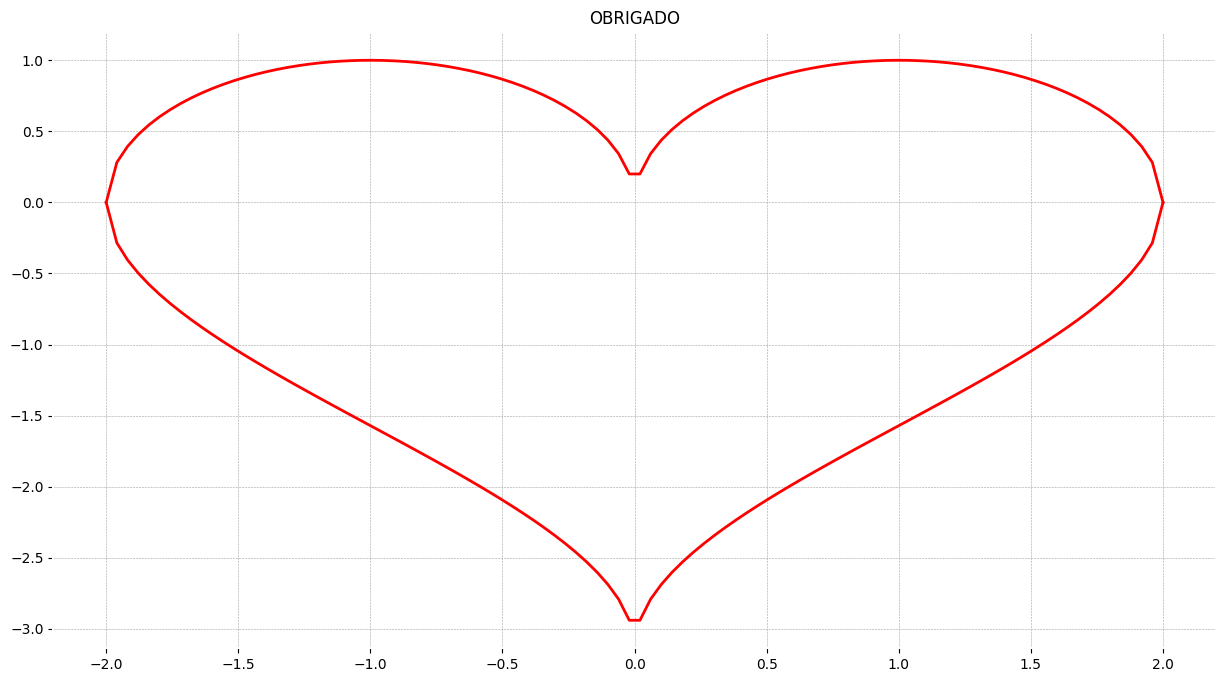

In [199]:
plt.plot(x,w1,color = "r")
plt.plot(x,w2, 'r')
plt.title("OBRIGADO")
plt.show()